# Dataset Examples Visualized

## Loading Dataset

In [8]:
import wfdb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

Will download from PhysioNet site and into folder 'mitdb'

In [9]:
wfdb.dl_database('mitdb', dl_dir='mitdb', overwrite=False)

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

Load one record as an example

In [10]:
record = wfdb.rdrecord('100', pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

Visualize the first 10 seconds of patient 100 from both channels/leads

Record info:
Sampling freq: 360
Signal shape: (650000, 2)
Lead names: ['MLII', 'V5']


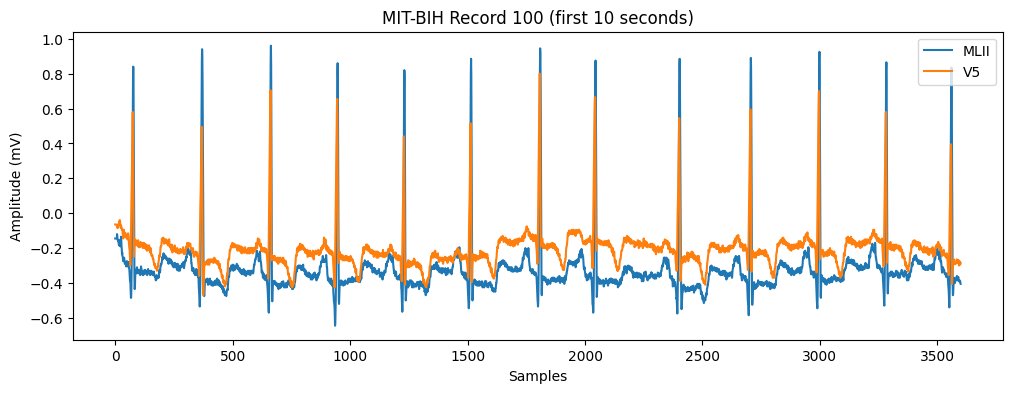

First 10 annotations (sample index + symbol):
18 +
77 N
370 N
662 N
946 N
1231 N
1515 N
1809 N
2044 A
2402 N


In [11]:
print("Record info:")
print("Sampling freq:", record.fs)
print("Signal shape:", record.p_signal.shape)
print("Lead names:", record.sig_name[:])

# 4. Plot first 10 seconds (360 Hz * 10 = 3600 samples)
n_samples = int(record.fs * 10)
plt.figure(figsize=(12,4))
plt.plot(record.p_signal[:n_samples,0], label=record.sig_name[0])
plt.plot(record.p_signal[:n_samples,1], label=record.sig_name[1])
plt.title("MIT-BIH Record 100 (first 10 seconds)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

# 5. Show first 10 beat annotations
print("First 10 annotations (sample index + symbol):")
for samp, symb in zip(annotation.sample[:10], annotation.symbol[:10]):
    print(samp, symb)

Function to visualize the first few beats from one lead, annotated for any patient based on record number

In [12]:
def plot_ecg_with_annotations(record_id, lead=0, duration_sec=10, start_sample=0):
    # Load record + annotation
    record = wfdb.rdrecord(record_id, pn_dir='mitdb')
    annotation = wfdb.rdann(record_id, 'atr', pn_dir='mitdb')

    freq = int(record.fs)
    end_sample = start_sample + duration_sec * freq

    # Extract signal
    signal = record.p_signal[start_sample:end_sample, lead]

    # Get annotations in window
    beat_times = annotation.sample
    beat_symbols = annotation.symbol
    within_window = (beat_times >= start_sample) & (beat_times < end_sample)
    beats_in_range = beat_times[within_window] - start_sample
    symbols_in_range = np.array(beat_symbols)[within_window]

    # Plot ECG
    plt.figure(figsize=(12, 4))
    plt.plot(np.linspace(0, duration_sec, len(signal)), signal,
             label=f'ECG Lead {record.sig_name[lead]}')

    # Annotate beats
    for be, si in zip(beats_in_range, symbols_in_range):
        plt.axvline(be / freq, color='red', linestyle='--', alpha=0.4)
        plt.text(be / freq, signal[be], si, fontsize=9, color='red',
                 ha='center', va='bottom')

    # Legend mapping (shortened for clarity)
    legend_text = [
        "N = Normal (N, L, R, e, j)",
        "S = Supraventricular (A, a, J, S)",
        "V = Ventricular (V, E)",
        "F = Fusion (F)",
        "Q = Unknown (/ f Q ? P)"
    ]
    legend_handles = [mpatches.Patch(color='red', label=txt) for txt in legend_text]

    plt.title(f"ECG Lead {record.sig_name[lead]} - Record {record_id} (First {duration_sec} s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)
    plt.legend(handles=legend_handles, loc='upper right')
    plt.show()

Visualize the first few beats annotated for patient 100

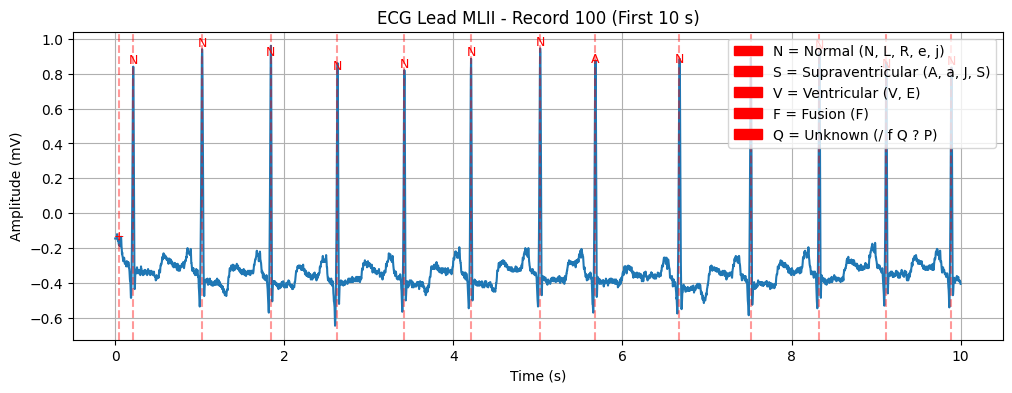

In [13]:
# Record 100 = mostly normal
plot_ecg_with_annotations("100", lead=0, duration_sec=10)

Visualize the first few beats annotated for patient 208 with the irregular ventricular ectopic beats (V)

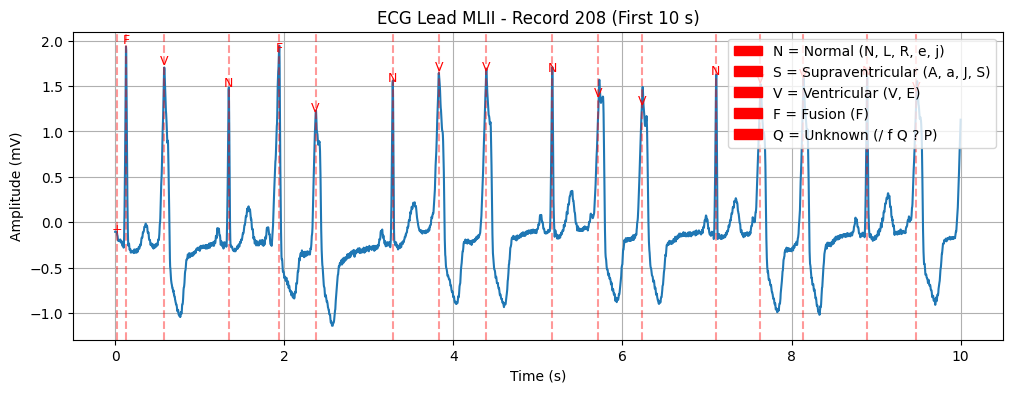

In [14]:
# Record 208 = lots of ventricular arrhythmias
plot_ecg_with_annotations("208", lead=0, duration_sec=10)